<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/Membrana_vibratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resolveremos cada uno de los incisos

$(1)$ $ \frac{\partial^2 u}{\partial t^2}=c^2( \frac{\partial^2 u}{\partial x^2}+ \frac{\partial^2 u}{\partial y^2})$

que satisfaga la condicnión de frontera.

$(2)$ $u=0$ en la frontera de la membrana para toda $t\geq0$ y dos condiciones iniciales.

$(3)$ $u(x,y,0)=f(x,y)$ [dado e desplaamiento inicial $f(x,y)$]

$(4)$ $ \frac{\partial u}{\partial t}_{t=0}^{}$ [dada la velocidad inicial $g(x,y)$]

$u(x,y,t)$ da el desplazamiento del punto $(x,y)$ de la membrana desde el resposo $(u=0)$ e el tiempo $t$. Se observa que las condiciones $(2)-(4)$ son similares a las de la cuerda vibratoria.

1. Suposición: Separación de variables

$
u(x, y, t) = X(x) Y(y) T(t)
$

Sustituyendo en la ecuación de onda y dividiendo entre $(XYT)$:

$
\frac{1}{T} \frac{d^2 T}{dt^2} = c^2 \left( \frac{1}{X} \frac{d^2 X}{dx^2} + \frac{1}{Y} \frac{d^2 Y}{dy^2} \right) = -\lambda$

Separando más:

$
\frac{1}{X} \frac{d^2 X}{dx^2} = -\mu, \quad \frac{1}{Y} \frac{d^2 Y}{dy^2} = -(\lambda - \mu)
$

2. Soluciones de las EDOs

Para $( X(x))$:

$
\frac{d^2 X}{dx^2} + \mu X = 0, \quad X(0) = 0, \quad X(a) = 0
\Rightarrow X_n(x) = \sin\left( \frac{n\pi x}{a} \right), \quad \mu = \left( \frac{n\pi}{a} \right)^2
$

Para $( Y(y))$:

$
\frac{d^2 Y}{dy^2} + (\lambda - \mu) Y = 0, \quad Y(0) = 0, \quad Y(b) = 0
\Rightarrow Y_m(y) = \sin\left( \frac{m\pi y}{b} \right), \quad \lambda - \mu = \left( \frac{m\pi}{b} \right)^2$

$
\Rightarrow \lambda = \left( \frac{n\pi}{a} \right)^2 + \left( \frac{m\pi}{b} \right)^2$

Para $( T(t))$:

$\frac{d^2 T}{dt^2} + c^2 \lambda T = 0
\Rightarrow T_{mn}(t) = A_{mn} \cos(\omega_{mn} t) + B_{mn} \sin(\omega_{mn} t)
\text{con } \omega_{mn} = c\pi \sqrt{ \left( \frac{n}{a} \right)^2 + \left( \frac{m}{b} \right)^2 }$

3. Solución general

$u(x, y, t) = \sum_{n=1}^\infty \sum_{m=1}^\infty \left[ A_{mn} \cos(\omega_{mn} t) + B_{mn} \sin(\omega_{mn} t) \right] \sin\left( \frac{n\pi x}{a} \right) \sin\left( \frac{m\pi y}{b} \right)$

4. Aplicar condiciones iniciales

Como $( g(x, y) = 0 \Rightarrow B_{mn} = 0 )$

Entonces:

$
u(x, y, t) = \sum_{n=1}^\infty \sum_{m=1}^\infty A_{mn} \sin\left( \frac{n\pi x}{a} \right) \sin\left( \frac{m\pi y}{b} \right) \cos(\omega_{mn} t)$

Los coeficientes $( A_{mn} )$ se calculan con:

$
A_{mn} = \frac{4}{ab} \int_0^a \int_0^b f(x, y) \sin\left( \frac{n\pi x}{a} \right) \sin\left( \frac{m\pi y}{b} \right) dy \, dx$

5. Aplicar a $( f(x, y) = 0.1(4x - x^2)(2y - y^2) )$, con $( a = 4 )$, $( b = 2 )$

$
A_{mn} = \frac{1}{2} \int_0^4 \int_0^2 (4x - x^2)(2y - y^2) \sin\left( \frac{n\pi x}{4} \right) \sin\left( \frac{m\pi y}{2} \right) dy \, dx$

Solución completa:

$
u(x, y, t) = \sum_{n=1}^\infty \sum_{m=1}^\infty A_{mn} \sin\left( \frac{n\pi x}{4} \right) \sin\left( \frac{m\pi y}{2} \right) \cos\left( \pi c \sqrt{ \left( \frac{n}{4} \right)^2 + \left( \frac{m}{2} \right)^2 } \, t \right)$


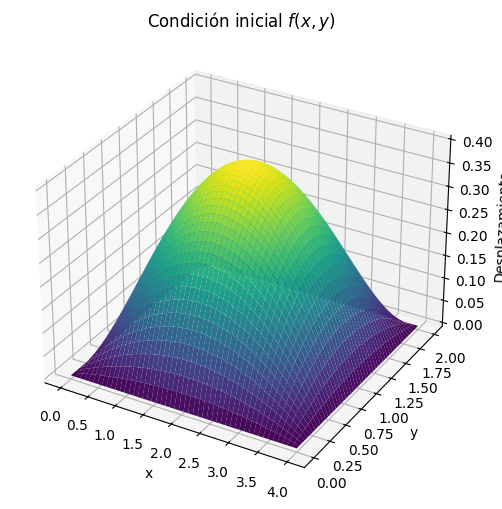

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sin, pi, integrate, lambdify

a, b = 4, 2
c = 1

x, y = symbols('x y')
fxy = 0.1 * (4*x - x**2) * (2*y - y**2)

def compute_A_mn(m, n):
    integrand = fxy * sin(n * pi * x / a) * sin(m * pi * y / b)
    integral = integrate(integrate(integrand, (y, 0, b)), (x, 0, a))
    A_mn = (4 / (a * b)) * integral
    return A_mn.simplify()

def u_series(x_val, y_val, t_val, N=5, M=5):
    u_val = 0
    for n in range(1, N+1):
        for m in range(1, M+1):
            A_mn = compute_A_mn(m, n)
            omega_mn = c * pi * np.sqrt((n/a)**2 + (m/b)**2)
            u_val += A_mn * np.sin(n * pi * x_val / a) * np.sin(m * pi * y_val / b) * np.cos(omega_mn * t_val)
    return u_val

f_lambdified = lambdify((x, y), fxy, modules='numpy')
X, Y = np.meshgrid(np.linspace(0, a, 50), np.linspace(0, b, 50))
Z = f_lambdified(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("Condición inicial $f(x, y)$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Desplazamiento")
plt.show()
